In [1]:
# importing required modules

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt 

In [2]:
import seaborn as sns

In [3]:
# loading iris dataset
dataset = datasets.load_iris()

In [4]:
X = dataset.data    # features
Y = dataset.target  # labels

X.shape, Y.shape

((150, 4), (150,))

In [5]:
# preproccessing using MinMaxScaler()
scaler = MinMaxScaler() 

scaler.fit(X)
X = scaler.transform(X)

In [6]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(X)  # creating a DataFrame
df.columns = dataset.feature_names  # Updating names of columns

In [8]:
df.head()  # printing first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


**Elbow plot - to find optimum number of clusters for K-Means**

In [9]:
sse = []  # sum of squared error

k_rng = range(1,10) 

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[["petal length (cm)", "petal width (cm)"]])
    sse.append(km.inertia_)
    
print(sse)

[28.36835321972719, 5.176463590044366, 1.701874688192097, 1.161523409420557, 0.8538617353912238, 0.6806539059219305, 0.5658013138564928, 0.49258566843020835, 0.41398356784855944]


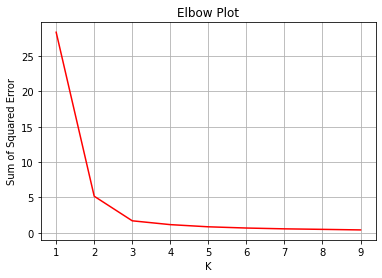

In [10]:
plt.plot(k_rng, sse, color = 'red')
plt.grid()
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.title("Elbow Plot")
plt.show()

*The optimum clusters is where the elbow occurs.
This is when the sum of squared error(SSE) doesn't decrease significantly with every iteration.
From this we choose the number of clusters as **'3**'.*

**Applying K-Means Clustering**

In [11]:
algo = KMeans(n_clusters = 3, random_state=0) # creating K-Means classifier
y_predict = algo.fit_predict(df[["petal length (cm)", "petal width (cm)"]])

y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
df['clusters'] = y_predict

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [14]:
centroids = algo.cluster_centers_ # centroids
centroids

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

In [15]:
df1 = df[df["clusters"] == 0]   # Iris-setosa dataframe
df2 = df[df["clusters"] == 1]   # Iris-vesicolour dataframe
df3 = df[df["clusters"] == 2]   # Iris-verginica dataframe

**Graph Plotting**

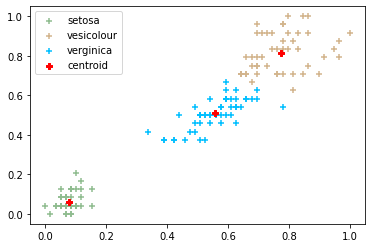

In [16]:
# Visualizing the clusters - On petal length (cm) and petal width (cm)
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color = "darkseagreen", marker = "+", label = "setosa")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color = "tan", marker = "+", label = "vesicolour")
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], color = "deepskyblue", marker = "+", label = "verginica")

# Plotting the centroids of the clusters
plt.scatter(centroids[:,0], centroids[:,1], color = "red", marker = "P", label = "centroid")

plt.legend()
plt.show()

***Another 
way for plotting the graph is using the seaborn library***

### Graph Plotting using Seaborn


In [17]:
import seaborn as sns

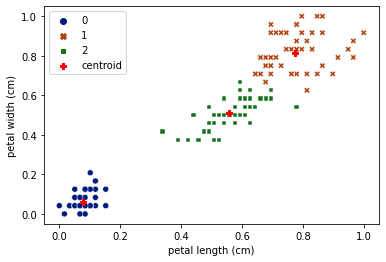

In [18]:
sns.scatterplot(x= "petal length (cm)", y = "petal width (cm)", hue="clusters", palette="dark", style="clusters",data = df)
plt.scatter(centroids[:,0], centroids[:,1], color = "red", marker = "P", label = "centroid")
plt.legend()
plt.show()